# CNN MNIST


## Loading and preprocessing the data


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import itertools
import numpy as np
import pandas as pd

In [2]:
mnist = tf.keras.datasets.mnist

(X_train_, y_train), (X_test_, y_test) = mnist.load_data()
X_train_, X_test_ = (
    X_train_.astype(np.float32) / 255.0,
    X_test_.astype(np.float32) / 255.0,
)

In [3]:
print(X_train_.shape)
print(X_test_.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
# Add another dimension
X_train = X_train_[..., np.newaxis]
X_test = X_test_[..., np.newaxis]
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
# Reduce dimension size
np.random.seed(0)

REDUCE_DIM = 2000
idx = np.random.permutation(REDUCE_DIM)

X_train = X_train[idx]
y_train = y_train[idx]
X_test = X_test[idx]
y_test = y_test[idx]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2000, 28, 28, 1)
(2000, 28, 28, 1)
(2000,)
(2000,)


### Implementing a CNN using the TensorFlow Keras API

#### Configuring CNN layers in Keras

- **Conv2D:** `tf.keras.layers.Conv2D`
  - `filters`
  - `kernel_size`
  - `strides`
  - `padding`
- **MaxPool2D:** `tf.keras.layers.MaxPool2D`
  - `pool_size`
  - `strides`
  - `padding`
- **Dropout** `tf.keras.layers.Dropout2D`
  - `rate`


### Constructing a CNN in Keras


In [6]:
tf.keras.backend.clear_session()
tf.random.set_seed(1)

model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape=(28, 28, 1)))

model.add(
    tf.keras.layers.Conv2D(
        filters=32,
        kernel_size=(5, 5),
        strides=(1, 1),
        padding="same",
        data_format="channels_last",
        name="conv_1",
        activation="relu",
    )
)

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=None, name="pool_1"))

model.add(
    tf.keras.layers.Conv2D(
        filters=64,
        kernel_size=(5, 5),
        strides=(1, 1),
        padding="same",
        name="conv_2",
        activation="relu",
    )
)

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=None, name="pool_2"))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=32, name="fc_1", activation="relu"))

model.add(tf.keras.layers.Dropout(rate=0.5))

model.add(tf.keras.layers.Dense(units=10, name="fc_2", activation="softmax"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 pool_1 (MaxPooling2D)       (None, 14, 14, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 14, 14, 64)        51264     
                                                                 
 pool_2 (MaxPooling2D)       (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 fc_1 (Dense)                (None, 32)                100384    
                                                                 
 dropout (Dropout)           (None, 32)                0

In [8]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [9]:
tf_fit = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
57/57 [==============================] - 2s 25ms/step - loss: 1.8030 - accuracy: 0.3539 - val_loss: 0.7457 - val_accuracy: 0.8800
Epoch 2/20
57/57 [==============================] - 1s 22ms/step - loss: 1.0503 - accuracy: 0.6317 - val_loss: 0.3867 - val_accuracy: 0.9000
Epoch 3/20
57/57 [==============================] - 1s 22ms/step - loss: 0.7612 - accuracy: 0.7328 - val_loss: 0.3134 - val_accuracy: 0.9150
Epoch 4/20
57/57 [==============================] - 1s 22ms/step - loss: 0.5684 - accuracy: 0.7950 - val_loss: 0.2413 - val_accuracy: 0.9300
Epoch 5/20
57/57 [==============================] - 1s 22ms/step - loss: 0.5500 - accuracy: 0.8122 - val_loss: 0.2313 - val_accuracy: 0.9350
Epoch 6/20
57/57 [==============================] - 1s 22ms/step - loss: 0.4923 - accuracy: 0.8278 - val_loss: 0.2036 - val_accuracy: 0.9550
Epoch 7/20
57/57 [==============================] - 1s 22ms/step - loss: 0.4475 - accuracy: 0.8422 - val_loss: 0.2290 - val_accuracy: 0.9400
Epoch 8/20
57

### During training, the train accuracy will be lower than validation accuracy due to dropout.


In [10]:
# Inspect the training history
df = pd.DataFrame(tf_fit.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.803037,0.353889,0.745691,0.880
1,1.050350,0.631667,0.386699,0.900
2,0.761235,0.732778,0.313385,0.915
3,0.568383,0.795000,0.241304,0.930
4,0.549973,0.812222,0.231277,0.935


<Axes: title={'center': 'Loss'}, xlabel='Epoch', ylabel='Loss'>

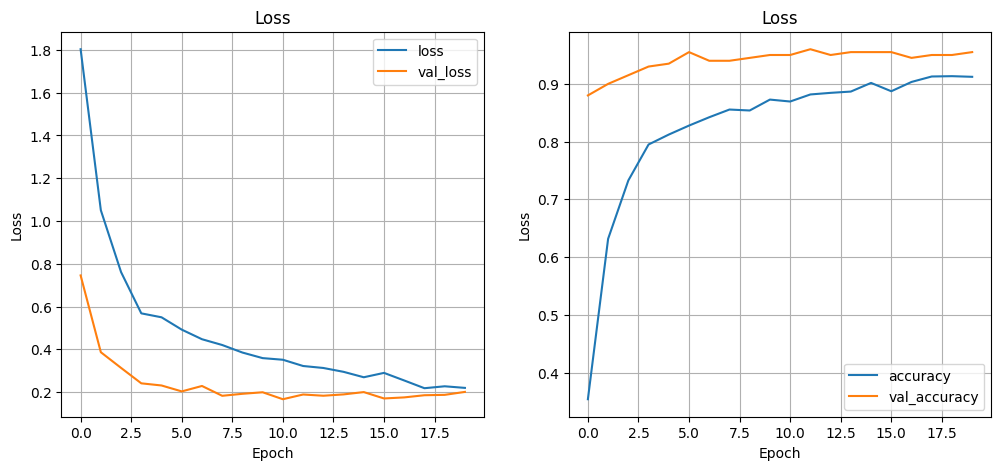

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

df[["loss", "val_loss"]].plot(
    ax=axes[0], title="Loss", grid=True, legend=True, xlabel="Epoch", ylabel="Loss"
)

df[["accuracy", "val_accuracy"]].plot(
    ax=axes[1], title="Loss", grid=True, legend=True, xlabel="Epoch", ylabel="Loss"
)

In [12]:
test_results = model.evaluate(X_test, y_test)
print("\nTest Acc. {:.2f}%".format(test_results[1] * 100))

63/63 [==============================] - 0s 5ms/step - loss: 0.1963 - accuracy: 0.9420

Test Acc. 94.20%


In [13]:
# Find misclassification
y_pred_tf = model(X_test)
y_pred_tf.numpy().shape

y_pred = tf.math.argmax(y_pred_tf, axis=1).numpy()
print(y_pred.shape)
print(y_test.shape)

loc = y_pred != y_test
print(f"Missclassification = {loc.sum()}")

(2000,)
(2000,)
Missclassification = 116


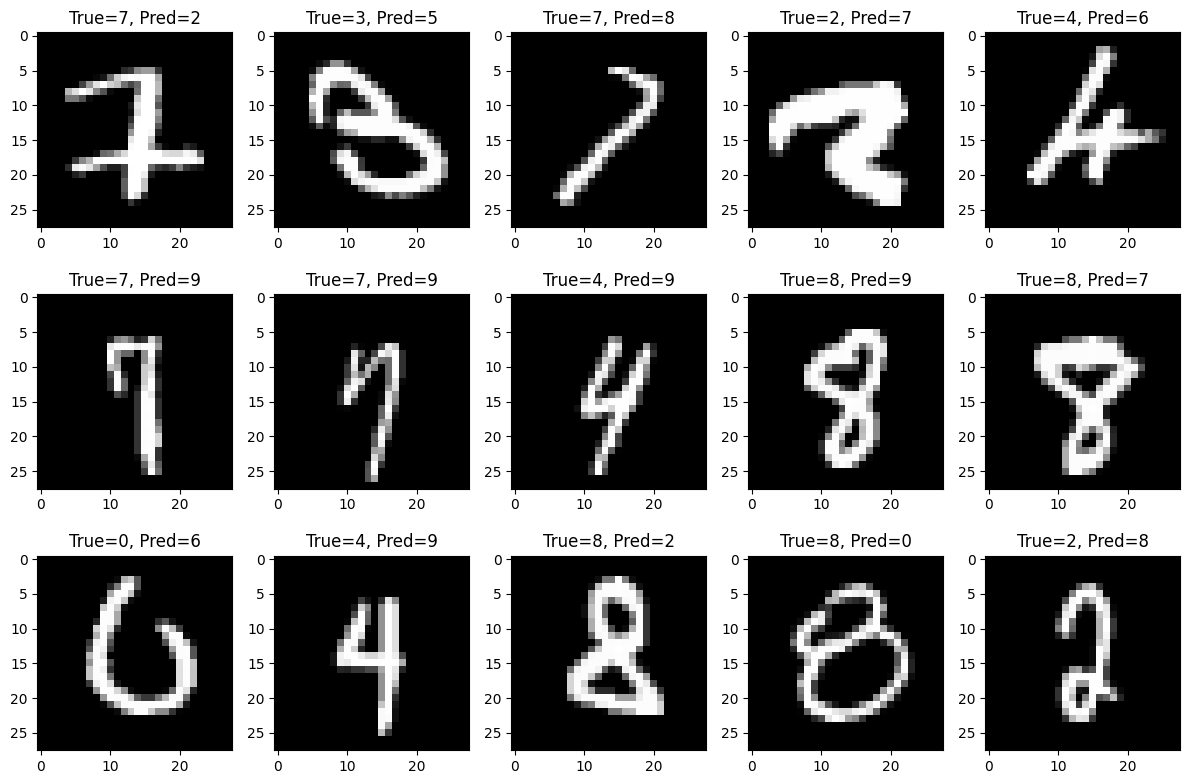

In [14]:
fig, axes2D = plt.subplots(3, 5, figsize=(12, 8))
axes = list(itertools.chain.from_iterable(axes2D))  # Flatten 2D list
X_test_miss = X_test[loc]
y_test_miss = y_test[loc]
y_pred_miss = y_pred[loc]
for idx, ax in enumerate(axes):
    ax.imshow(X_test_miss[idx], cmap="gray")
    ax.set_title(f"True={y_test_miss[idx]}, Pred={y_pred_miss[idx]}")
fig.tight_layout()
plt.show()